#Task-3: Music Recommendation
#AUTHOR: Aditya Gurav
Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
ntr = 7000
nts = 3000
train = pd.read_csv('/train.csv',nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('/train.csv',names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv('/content/songs.csv')
members = pd.read_csv('/members.csv')
#/content/test.csv

In [15]:
 train.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1


In [16]:
songs.head(2)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0


In [17]:
members.head(2)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622


#Data Visualisation

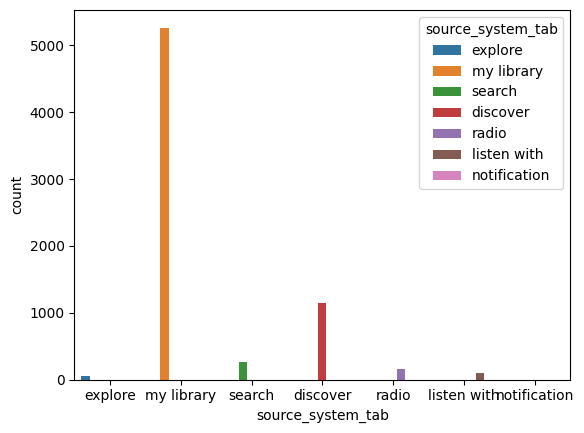

In [18]:
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])
plt.show()

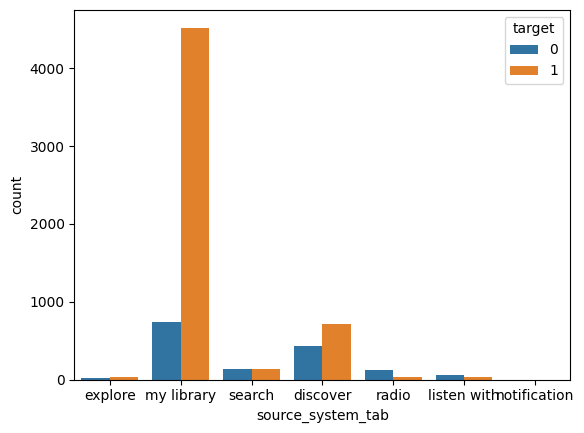

In [19]:
sns.countplot(x = train['source_system_tab'],hue=train['target'])
plt.show()

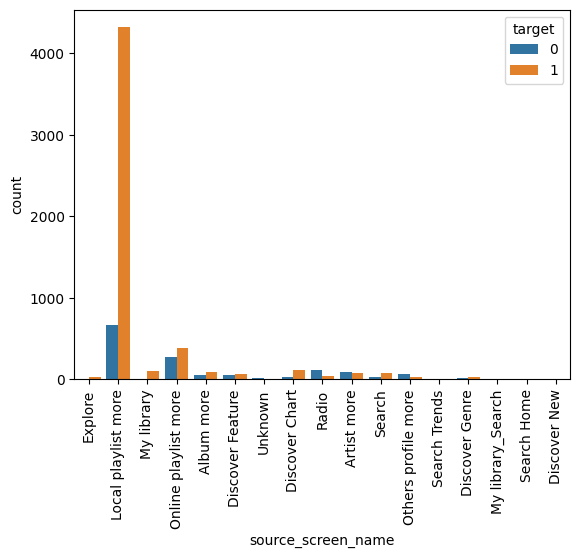

In [20]:
sns.countplot(x = train['source_screen_name'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

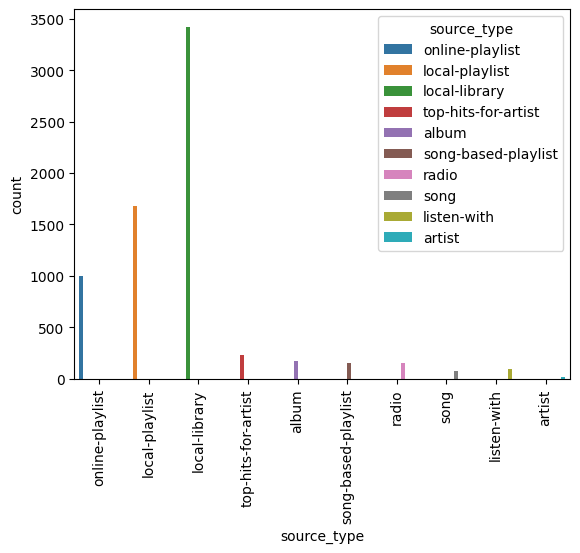

In [21]:
sns.countplot(x = train['source_type'],hue=train['source_type'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

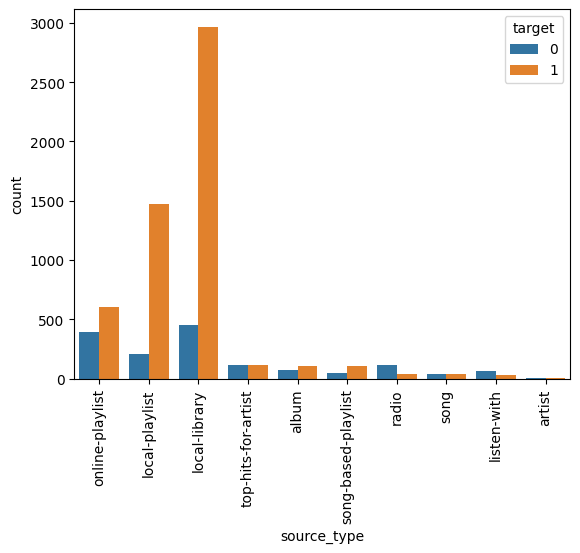

In [22]:
sns.countplot(x = train['source_type'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

<Axes: xlabel='language', ylabel='count'>

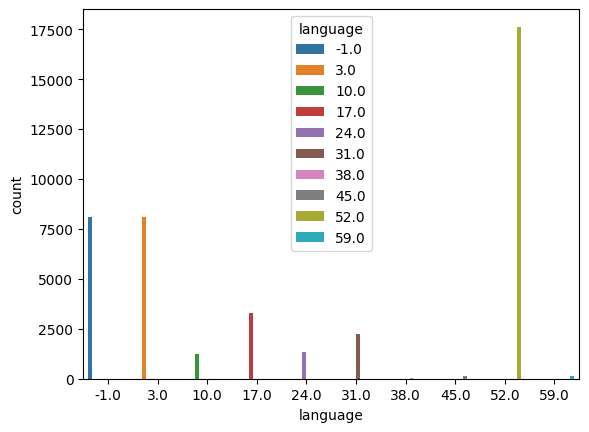

In [23]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

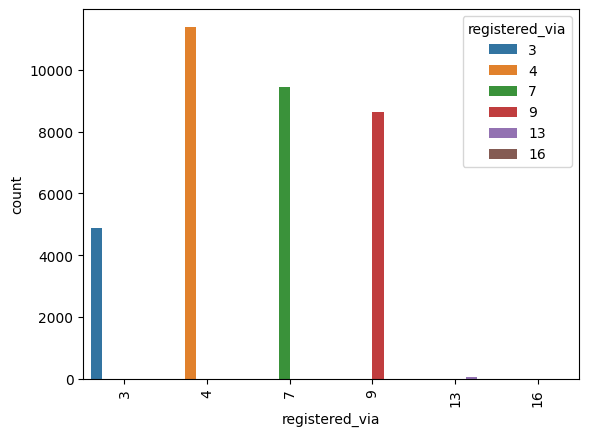

In [24]:
sns.countplot(x = members['registered_via'],hue=members['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show()

#Data Preprocessing

In [25]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [26]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [27]:
test.head(2)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library


In [28]:

song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [29]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [30]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [31]:
train = train.fillna(-1)
test = test.fillna(-1)

In [32]:
import gc
del members, songs; gc.collect();

In [33]:
cols = list(train.columns)
cols.remove('target')

In [34]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 18/18 [00:00<00:00, 135.19it/s]


In [35]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

#Training the Model

In [36]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)

del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

watchlist = [d_train, d_valid]

In [37]:
from sklearn.metrics import accuracy_score
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    print('Accuracy Score : {}'.format(accuracy_score(y_valid,y_pred)))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy Score : 0.7785714285714286
Accuracy on test data for the model 74.9


In [39]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy Score : 0.8371428571428572
Accuracy on test data for the model 79.16666666666666


#Predicting through LIGHTGBM

In [40]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.151110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's auc: 0.89549	valid_1's auc: 0.788979
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's auc: 0.924996	valid_1's auc: 0.825475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's auc: 0.937278	valid_1's auc: 0.832146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's auc: 0.946606	valid_1's auc: 0.840521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	training's auc: 0.951984	valid_1's auc: 0.847144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	training's auc: 0.960774	valid_1's auc: 0.845694
[LightG

In [41]:
p_test = model1.predict(X_test)

In [42]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.800000%


#Random Model

In [43]:
rd_seed = np.random.uniform(0,1,nts)
yhat_rand = (rd_seed>0.5).astype(int)
comp_rand = (yhat_rand==ytr).astype(int)
acc_rand = comp_rand.sum()/comp_rand.size*100
print('The accuracy of random model on test data is: {0:f}%'.format(acc_rand))

The accuracy of random model on test data is: 49.066667%
